# Scatter Plots of Samples

In [1]:
from copy import deepcopy
from numpy import ceil, linspace, meshgrid, zeros, array, arange
from mpl_toolkits.mplot3d.axes3d import Axes3D

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


from qmcpy import *

In [2]:
n = 128

## IID Samples
Visualize IID standard uniform and standard normal sampling points

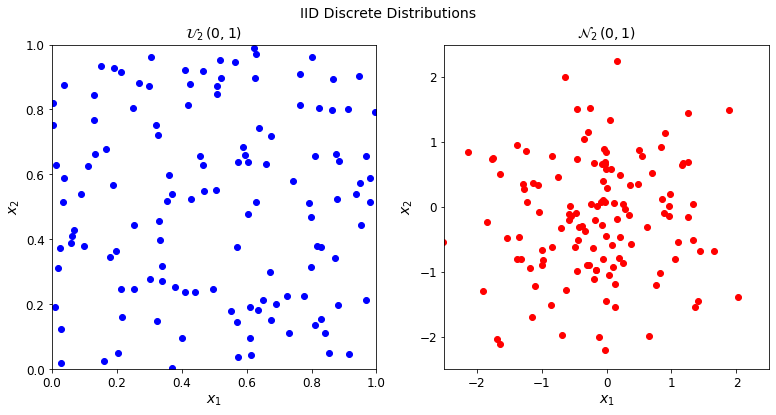

In [3]:
discrete_distribs = [
    IIDStdUniform(dimension=2, seed=7),
    IIDStdGaussian(dimension=2, seed=7)]
dd_names = ["$\\mathcal{U}_2\\,(0,1)$", "$\\mathcal{N}_2\\,(0,1)$"]
colors = ["b", "r"]
lims = [[0, 1], [-2.5, 2.5]]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
for i, (dd_obj, color, lim, dd_name) in enumerate(zip(discrete_distribs, colors, lims, dd_names)):
    samples = dd_obj.gen_samples(n)
    ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")
    ax[i].set_xlim(lim)
    ax[i].set_ylim(lim)
    ax[i].set_aspect("equal")
    ax[i].set_title(dd_name)
fig.suptitle("IID Discrete Distributions")
plt.tight_layout()
fig.savefig("../outputs/sample_scatters/iid_dd.png", dpi=200)

## LDS Samples
Visualize shifted lattice and scrambled Sobol sampling points

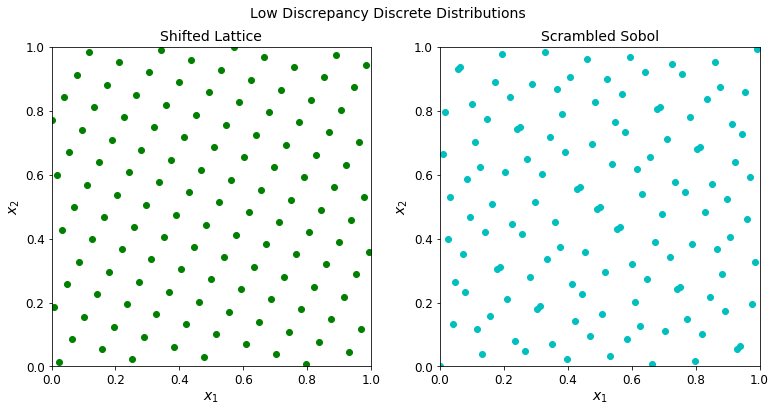

In [4]:
discrete_distribs = [
    Lattice(dimension=2, scramble=True, replications=0, seed=7, backend='GAIL'),
    Sobol(dimension=2, scramble=True, replications=0, seed=7, backend='MPS')]
dd_names = ["Shifted Lattice", "Scrambled Sobol"]
colors = ["g", "c"]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
for i, (dd_obj, color, dd_name) in \
        enumerate(zip(discrete_distribs, colors, dd_names)):
    samples = dd_obj.gen_samples(n_min=0, n_max=n)
    ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")
    ax[i].set_xlim([0, 1])
    ax[i].set_ylim([0, 1])
    ax[i].set_aspect("equal")
    ax[i].set_title(dd_name)
fig.suptitle("Low Discrepancy Discrete Distributions")
plt.tight_layout()
fig.savefig("../outputs/sample_scatters/lds_dd.png", dpi=200)

## Transform to the True Distribution
Transform our Discrete Distribution samples to mimic various True Distributions

In [5]:
def plot_tm_tranformed(tm_name, color, lim, measure, **kwargs):
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(13, 4))
    i = 0
    # IID Distributions
    iid_distribs = [
        IIDStdUniform(dimension=2, seed=7),
        IIDStdGaussian(dimension=2, seed=7)]
    iid_names = [
        "IID $\\mathcal{U}_2\\,(0,1)$",
        "IID $\\mathcal{N}_2\\,(0,1)$"]
    for distrib, distrib_name in zip(iid_distribs, iid_names):
        measure_obj = measure(distrib, **kwargs)
        samples = measure_obj.gen_samples(n)
        ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
        i += 1
    # Quasi Random Distributions
    qrng_distribs = [
        Lattice(dimension=2, scramble=True, replications=0, seed=7, backend='GAIL'),
        Sobol(dimension=2, scramble=True, replications=0, seed=7, backend='MPS')]
    qrng_names = ["Shifted Lattice",
                  "Scrambled Sobol"]
    for distrib, distrib_name in zip(qrng_distribs, qrng_names):
        measure_obj = measure(distrib, **kwargs)
        samples = measure_obj.gen_samples(n_min=0,n_max=n)
        ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
        i += 1
    # Plot Metas
    for i,distrib in enumerate(iid_distribs+qrng_distribs):
        ax[i].set_xlabel("$x_1$")
        ax[i].set_ylabel("$x_2$")
        ax[i].set_xlim(lim)
        ax[i].set_ylim(lim)
        ax[i].set_aspect("equal")
        ax[i].set_title(type(distrib).__name__)
    fig.suptitle("Transformed to %s from..." % tm_name)
    plt.tight_layout()
    prefix = type(measure).__name__
    fig.savefig("../outputs/sample_scatters/%s_tm_transform.png" % prefix, dpi=200)

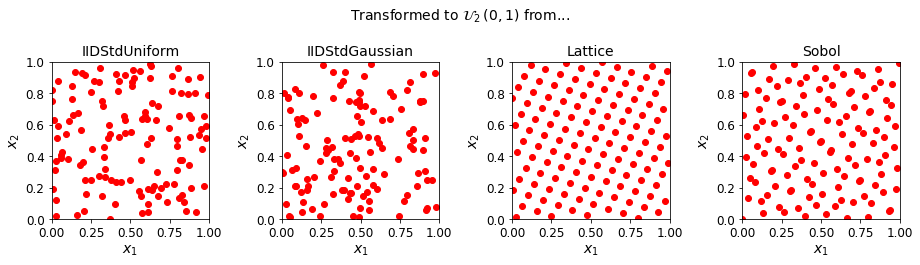

In [6]:
plot_tm_tranformed("$\\mathcal{U}_2\\,(0,1)$","r",[0, 1],Uniform)

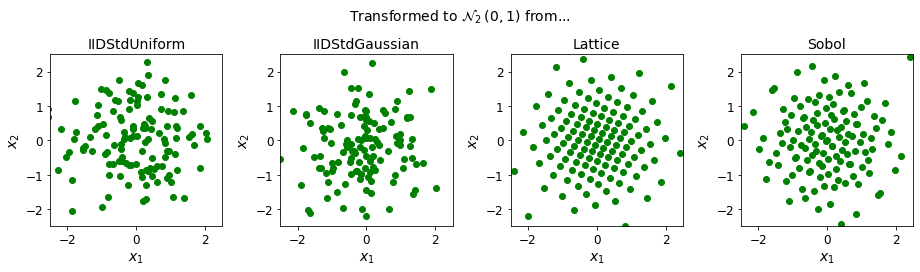

In [7]:
plot_tm_tranformed("$\\mathcal{N}_2\\,(0,1)$","g",[-2.5, 2.5],Gaussian)

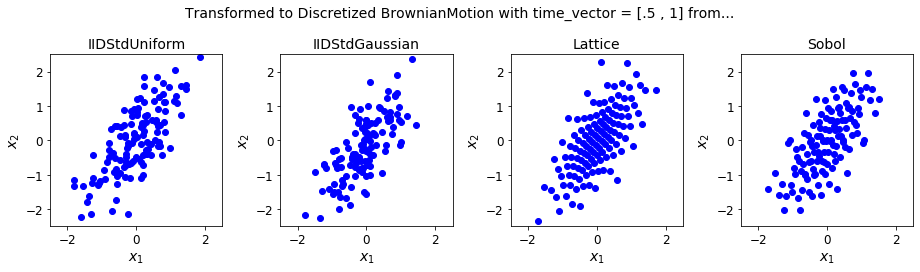

In [8]:
plot_tm_tranformed("Discretized BrownianMotion with time_vector = [.5 , 1]",
                   "b",[-2.5, 2.5],BrownianMotion,time_vector= [.5,1])

## Shift and Stretch the True Distribution
Transform Sobol sequences to mimic non-standard Uniform and Gaussian measures

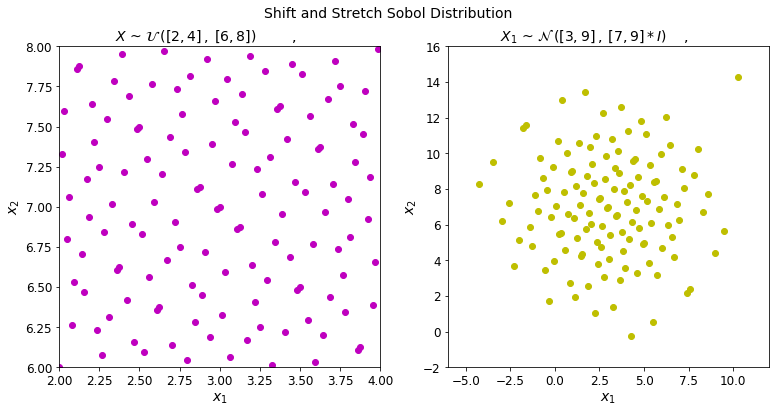

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
u1_a, u1_b = 2, 4
u2_a, u2_b = 6, 8
g1_mu, g1_var = 3, 9
g2_mu, g2_var = 7, 9
distribution = Sobol(dimension=2, scramble=True, replications=0, seed=7, backend='MPS')
uniform_measure = Uniform(distribution,lower_bound=[u1_a, u2_a],upper_bound=[u1_b, u2_b])
gaussian_measure = Gaussian(distribution,mean=[g1_mu, g2_mu],variance=[g1_var, g2_var])
# Generate Samples and Create Scatter Plots
for i, (measure, color) in enumerate(zip([uniform_measure, gaussian_measure], ["m", "y"])):
    samples = measure.gen_samples(n_min=0, n_max=n)
    ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
# Plot Metas
for i in range(2):
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")
    ax[i].set_aspect("equal")
ax[0].set_title("$X$ ~ $\\mathcal{U}\\,([%d,%d] \:,\: [%d,%d])$\t,\t" % (u1_a, u1_b,u2_a, u2_b))
ax[1].set_title("$X_1$ ~ $\\mathcal{N}\\,([%d,%d] \:,\: [%d,%d]*I)$\t,\t" % (g1_mu, g1_var,g2_mu, g2_var))
ax[0].set_xlim([u1_a, u1_b])
ax[0].set_ylim([u2_a, u2_b])
spread_g1 = ceil(3 * g1_var**.5)
spread_g2 = ceil(3 * g2_var**.5)
ax[1].set_xlim([g1_mu - spread_g1, g1_mu + spread_g1])
ax[1].set_ylim([g2_mu - spread_g2, g2_mu + spread_g2])
fig.suptitle("Shift and Stretch Sobol Distribution")
plt.tight_layout()
fig.savefig("../outputs/sample_scatters/shift_stretch_tm.png", dpi=200)

## Plots samples on a 2D Keister function

In [10]:
# Generate constants for 3d plot in following cell
abs_tol = .5
distribution = IIDStdGaussian(dimension=2, seed=7)
measure = Gaussian(distribution, variance=1/2)
integrand = Keister(measure)
stopper = CLT(distribution,abs_tol=abs_tol,rel_tol=0,n_init=16, n_max=1e10)
solution,data = integrate(stopper,integrand,measure,distribution)
print(data)

Solution: 2.0554         
Keister (Integrand Object)
IIDStdGaussian (Discrete Distribution Object)
	dimension       2
	seed            7
	mimics          StdGaussian
Gaussian (True Measure Object)
	distrib_name    IIDStdGaussian
	mean            0
	variance        0.500
CLT (Stopping Criterion Object)
	inflate         1.200
	alpha           0.010
	abs_tol         0.500
	rel_tol         0
	n_init          16
	n_max           10000000000
MeanVarData (AccumData Object)
	levels          1
	solution        2.055
	n               65
	n_total         81
	confid_int      [ 1.646  2.464]
	time_total      0.002



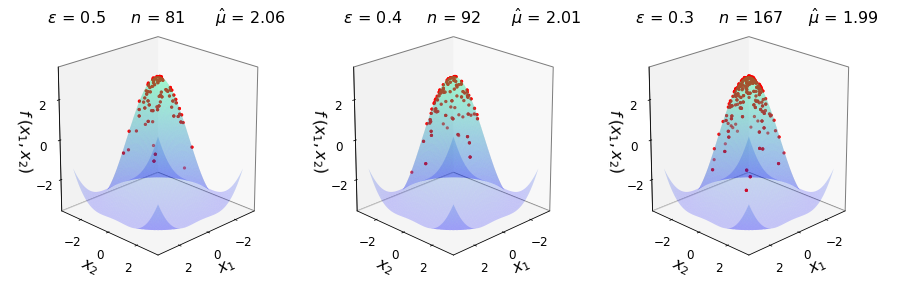

In [11]:
# Constants based on running the above CLT Example
eps_list = [.5, .4, .3]
n_list = [81, 92, 167]
mu_hat_list = [2.0554, 2.0143, 1.9926]

# Function Points
nx, ny = (100, 100)
points_fun = zeros((nx * ny, 3))
x = linspace(-3, 3, nx)
y = linspace(-3, 3, ny)
x_2d, y_2d = meshgrid(x, y)
points_fun[:, 0] = x_2d.flatten()
points_fun[:, 1] = y_2d.flatten()
points_fun[:, 2] = integrand.f(points_fun[:, :2])
x_surf = points_fun[:, 0].reshape((nx, ny))
y_surf = points_fun[:, 1].reshape((nx, ny))
z_surf = points_fun[:, 2].reshape((nx, ny))

# 3D Plot
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131, projection="3d")
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")

for idx, ax in enumerate([ax1, ax2, ax3]):
    n = n_list[idx]
    epsilon = eps_list[idx]
    mu = mu_hat_list[idx]
    # Surface
    ax.plot_surface(x_surf, y_surf, z_surf, cmap="winter", alpha=.2)
    # Scatters
    points = zeros((n, 3))
    points[:, :2] = measure.gen_samples(n)
    points[:, 2] = integrand.f(points[:, :2]).squeeze()
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="r", s=5)
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="r", s=5)
    ax.set_title("\t$\\epsilon$ = %-7.1f $n$ = %-7d $\\hat{\\mu}$ = %-7.2f "
                 % (epsilon, n, mu), fontdict={"fontsize": 16})
    # axis metas
    n *= 2
    ax.grid(False)
    ax.xaxis.pane.set_edgecolor("black")
    ax.yaxis.pane.set_edgecolor("black")
    ax.set_xlabel("$x_1$", fontdict={"fontsize": 16})
    ax.set_ylabel("$x_2$", fontdict={"fontsize": 16})
    ax.set_zlabel("$f\\:(x_1,x_2)$", fontdict={"fontsize": 16})
    ax.view_init(20, 45)
plt.savefig("../outputs/sample_scatters/Three_3d_SurfaceScatters.png", dpi=250, bbox_inches="tight", pad_inches=.15)